In [20]:
data_dir = '../data/mushrooms.csv'
mushrooms_df = pd.read_csv(data_dir, delimiter=',', encoding='UTF-8')

In [6]:
mushrooms_df.shape

(8124, 23)

In [7]:
target_collumn = 'class'
feature_columns = mushrooms_df.columns.drop([target_collumn])

In [8]:
x = mushrooms_df[feature_columns]
x[0:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [9]:
data_ = preprocessing.LabelEncoder()
for column in feature_columns : 
    data_unique = x[column].unique()
    data_.fit(data_unique)
    x[column] = data_.transform(x[column] ) 

/Users/cbml5653/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
x.values

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [11]:
y = mushrooms_df["class"]
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x.values, y, test_size=0.3, random_state=3)

In [13]:
mushTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
mushTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
mushTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
predTree = mushTree.predict(X_testset)

In [16]:
print (predTree [0:5])
print (y_testset [0:5])

['e' 'e' 'e' 'e' 'e']
3689    e
3768    e
2084    e
5804    e
1866    e
Name: class, dtype: object


In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.963084495488105


In [18]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

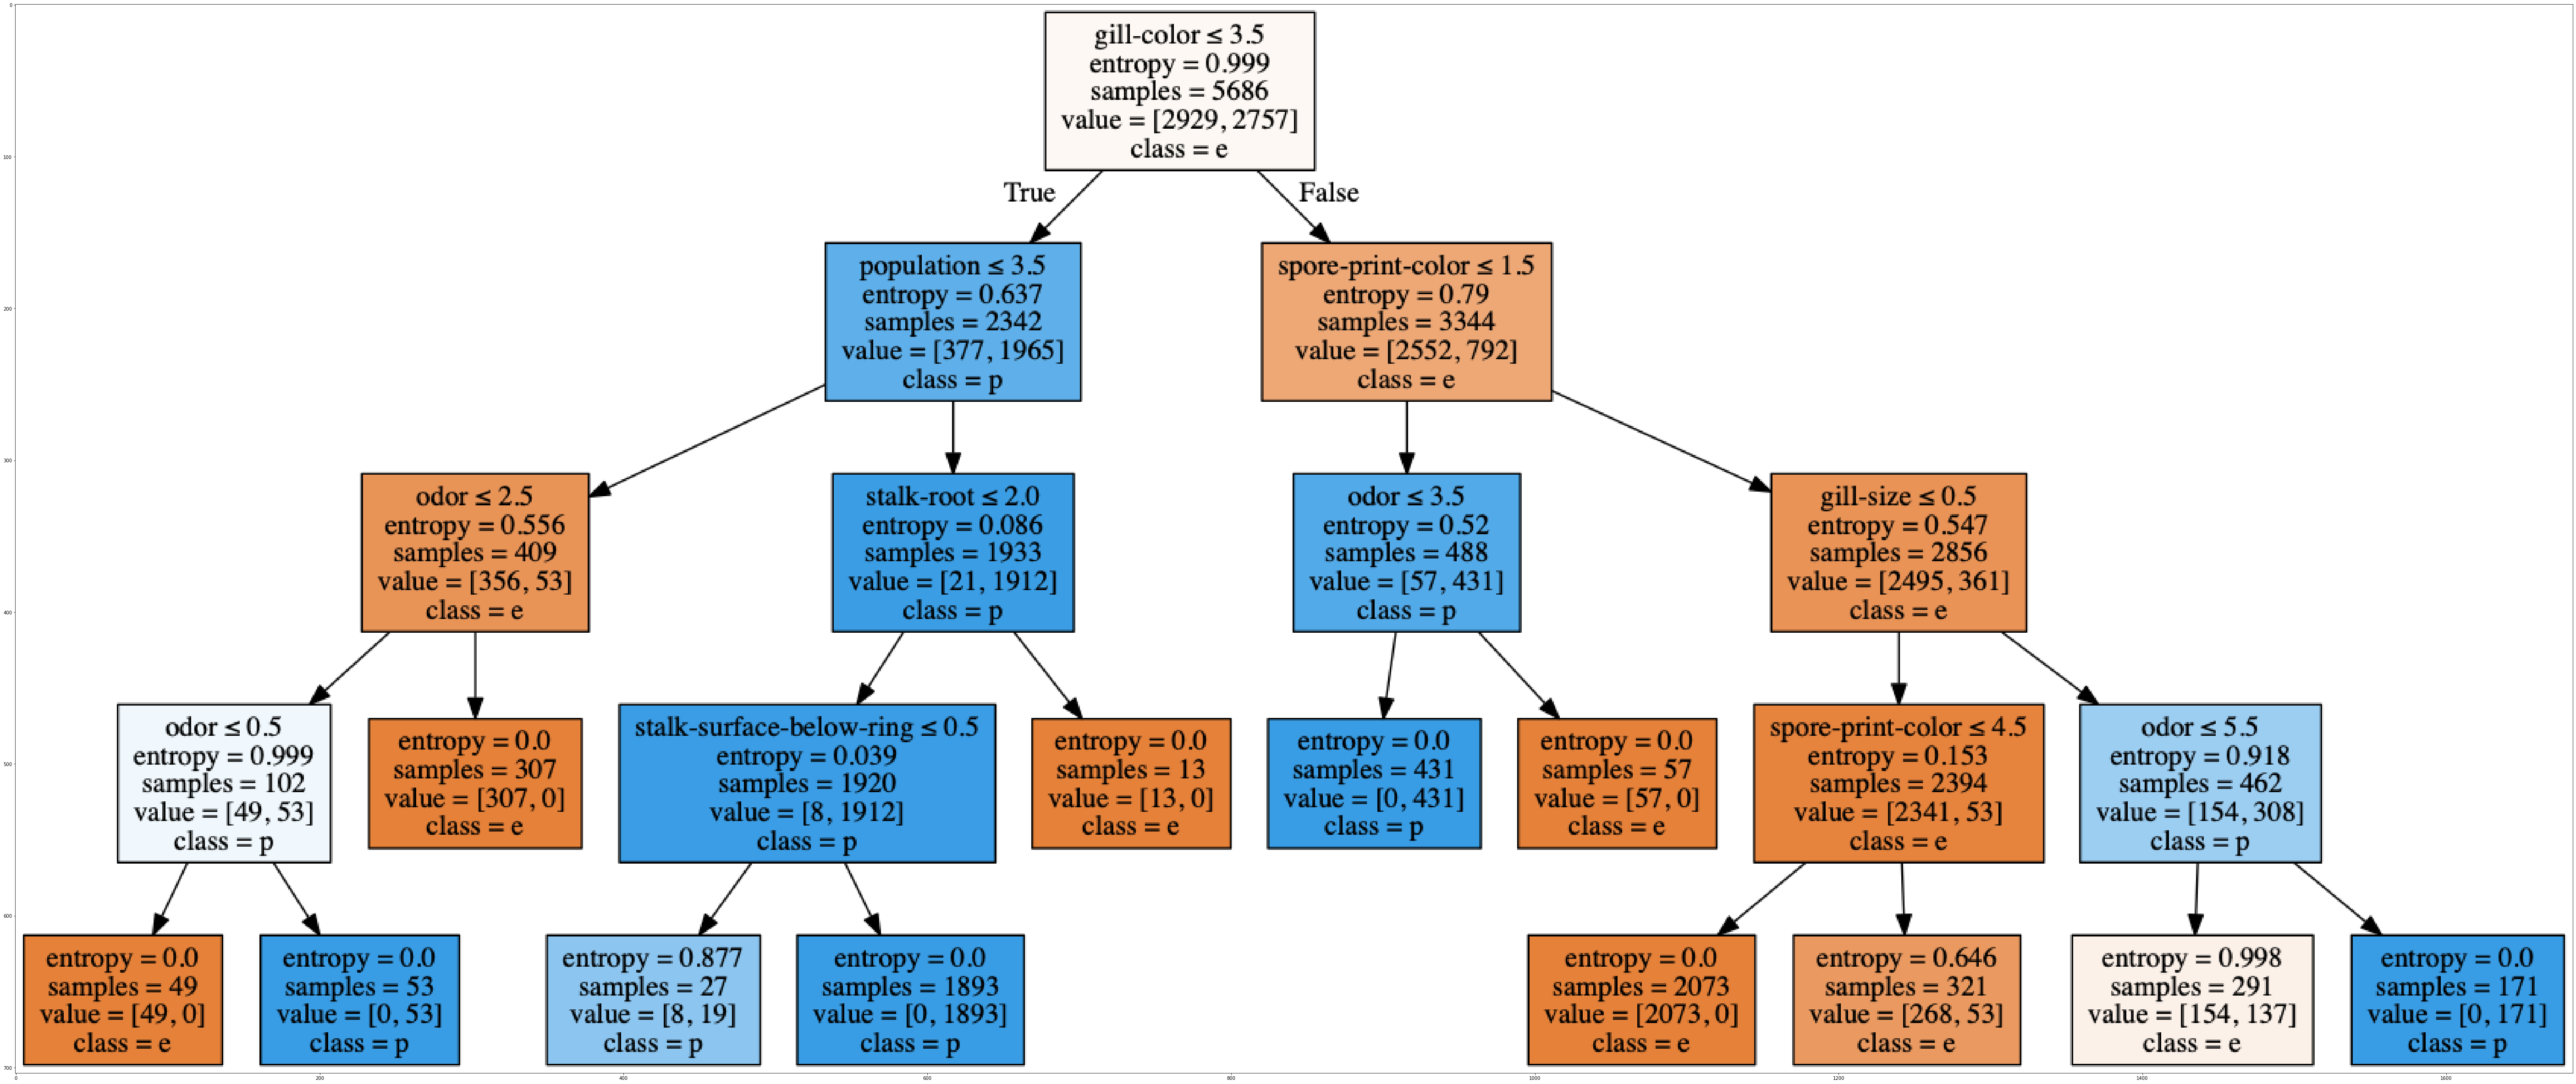

In [19]:
dot_data = StringIO()
filename = "mushtree.png"
targetNames = mushrooms_df["class"].unique().tolist()
out=tree.export_graphviz(mushTree,feature_names=feature_columns, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [38]:
np.unique(y_trainset)

array(['e', 'p'], dtype=object)